In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from pandas import DataFrame

In [2]:
# Load dataset
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    object 
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    object 
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
# summary statistics
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [5]:
# for each of the categorical columns, lets see the unique values
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [25]:
features = ['A','B','C','D','E','F','G','H','I', 'J', 'K', 'L', 'M', 'N', 'O']
label = ['P']

X = df[features]

y = df[label]

In [6]:
df = df.replace('?','1')

In [7]:
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['b' 'a' '1']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '1' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [8]:
# Separate target from features
y = df['P']
features = df.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0


In [9]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,2.0,157.0,0.000,2.0,1.0,13.0,8.0,1.25,1.0,1.0,1,0.0,0.0,68.0,0
1,1.0,329.0,4.460,2.0,1.0,11.0,4.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,1.0,90.0,0.500,2.0,1.0,11.0,4.0,1.50,1.0,0.0,0,0.0,0.0,96.0,824
3,2.0,126.0,1.540,2.0,1.0,13.0,8.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,2.0,44.0,5.625,2.0,1.0,13.0,8.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [10]:
#Exploratory Data Analysis
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64

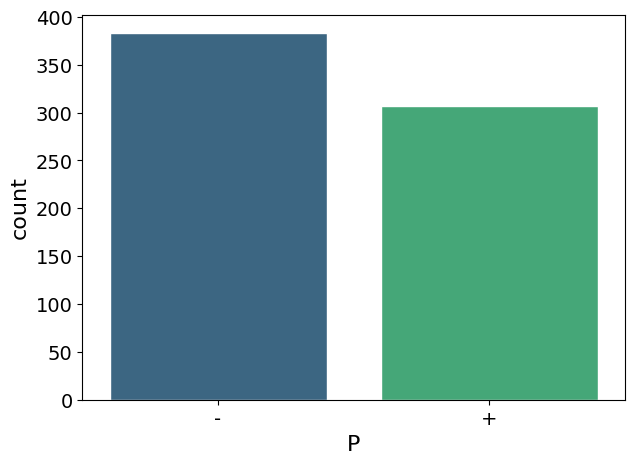

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='P',edgecolor="white",palette="viridis",order=df["P"].value_counts().index)
total = df['P'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('P', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [12]:
import matplotlib.pyplot as plt # plotting

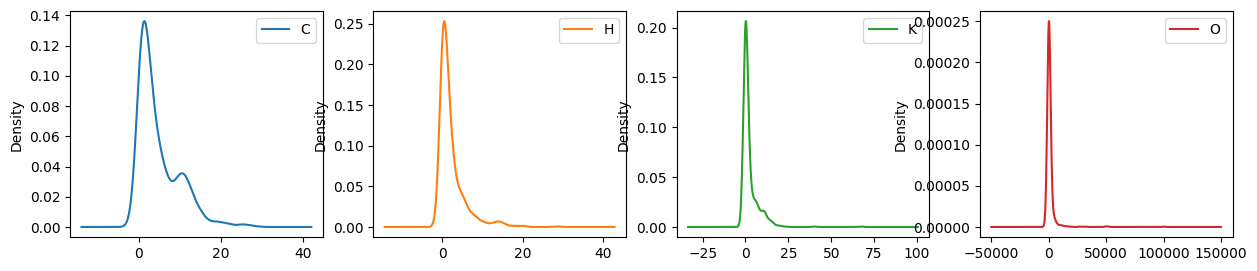

In [13]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
features = numerical
df[features].plot(
    kind="density", subplots=True, layout=(3, 4), sharex=False, figsize=(15, 10)
);

In [14]:
print(" There are {} numerical variables \n".format(len(numerical)))
print(" The numerical variables are :",numerical)

 There are 4 numerical variables 

 The numerical variables are : ['C', 'H', 'K', 'O']


<ipython-input-15-d767ede9e21f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["H"])


<Axes: xlabel='H', ylabel='Density'>

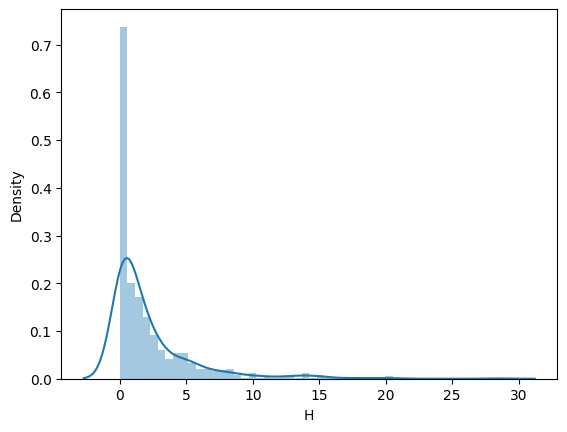

In [15]:
# distribution plot
sns.distplot(df["H"])

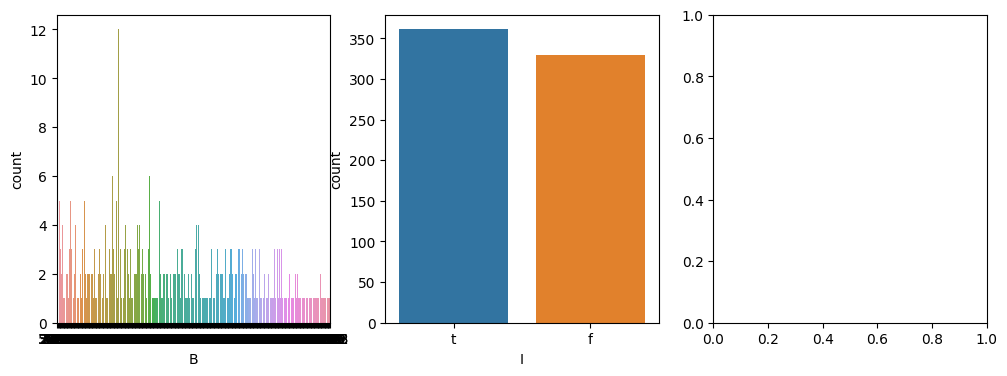

In [16]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.countplot(x="B", data=df, ax=axes[0])
sns.countplot(x="I", data=df, ax=axes[1]);

<Axes: >

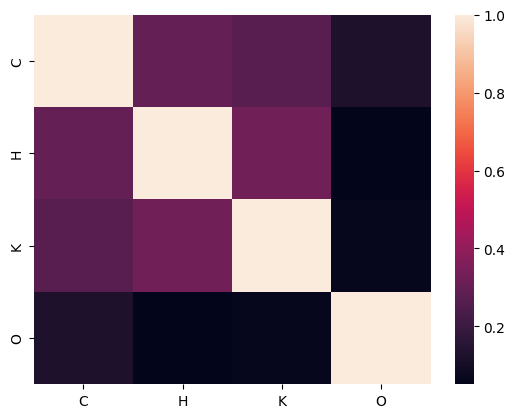

In [17]:
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

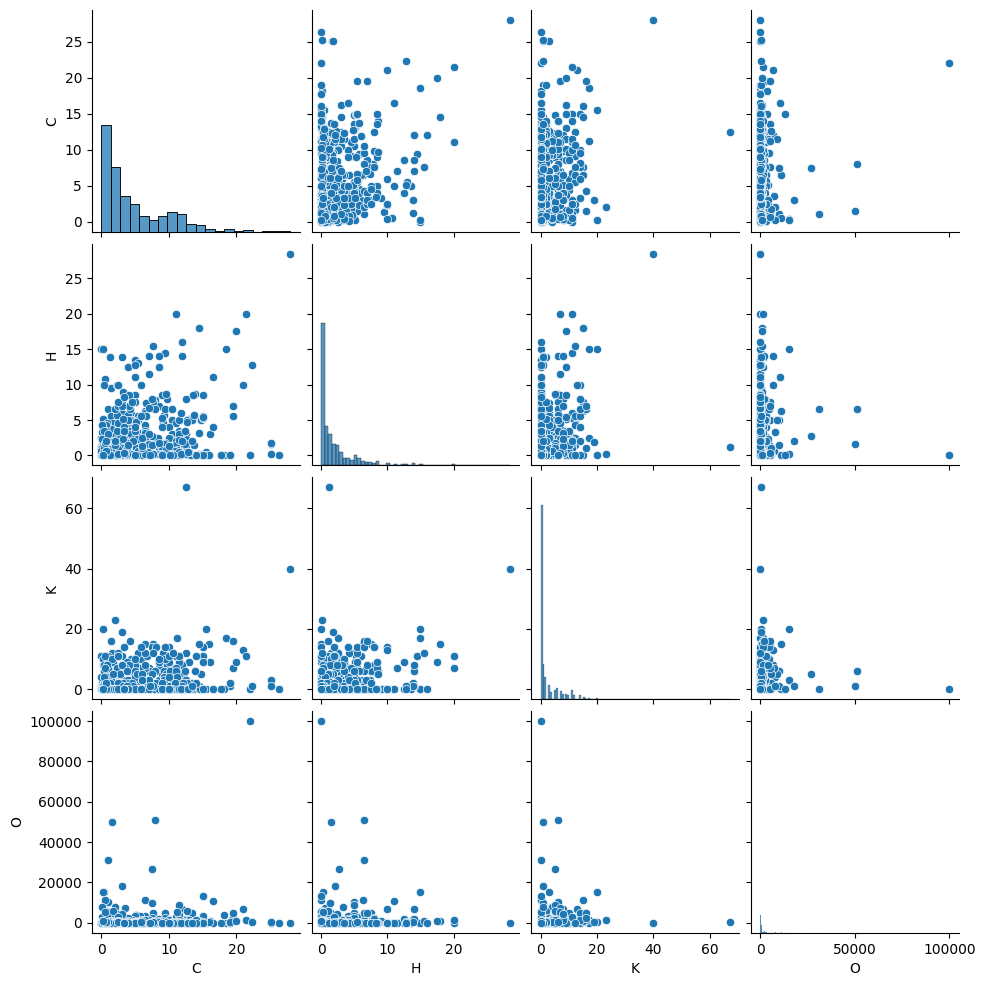

In [18]:
sns.pairplot(df[numerical]);

Decision Trees

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [49]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

In [50]:
y_pred = clf.predict(X_test.values)

In [51]:
list(zip(X_test, y_pred, y_test))

[('A', '+', '-'),
 ('B', '+', '+'),
 ('C', '+', '-'),
 ('D', '+', '-'),
 ('E', '+', '+'),
 ('F', '+', '+'),
 ('G', '+', '-'),
 ('H', '+', '+'),
 ('I', '+', '-'),
 ('J', '+', '-'),
 ('K', '+', '-'),
 ('L', '+', '+'),
 ('M', '+', '+'),
 ('N', '+', '-'),
 ('O', '+', '-')]

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.46      1.00      0.63       103
     class_1       1.00      0.02      0.03       125

    accuracy                           0.46       228
   macro avg       0.73      0.51      0.33       228
weighted avg       0.75      0.46      0.30       228



Bagging

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_test, y_test)

In [54]:
y_pred_rf = clf_rf.predict(X_test)

In [55]:
list(zip(X_test, y_pred_rf, y_test))

[('A', '-', '-'),
 ('B', '+', '+'),
 ('C', '-', '-'),
 ('D', '-', '-'),
 ('E', '-', '+'),
 ('F', '-', '+'),
 ('G', '-', '-'),
 ('H', '+', '+'),
 ('I', '-', '-'),
 ('J', '-', '-'),
 ('K', '-', '-'),
 ('L', '+', '+'),
 ('M', '-', '+'),
 ('N', '-', '-'),
 ('O', '-', '-')]

In [56]:
print(classification_report(y_test, y_pred_rf, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.94      0.79      0.86       103
     class_1       0.85      0.96      0.90       125

    accuracy                           0.88       228
   macro avg       0.89      0.87      0.88       228
weighted avg       0.89      0.88      0.88       228



Stacking

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
estimators = [
  ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
  ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
  ]
clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=2)

In [58]:
clf_stck = clf_stck.fit(X_train, y_train)

In [59]:
y_pred_stck = clf_stck.predict(X_test.values)

In [60]:
print(classification_report(y_test, y_pred_stck, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.47      1.00      0.64       103
     class_1       1.00      0.06      0.11       125

    accuracy                           0.48       228
   macro avg       0.73      0.53      0.37       228
weighted avg       0.76      0.48      0.35       228



Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [62]:
y_pred_gb = clf_gb.predict(X_test.values)

In [65]:
print(classification_report(y_test, y_pred_gb, target_names=[f'class_{i}' for i in range(2)], zero_division=1))

              precision    recall  f1-score   support

     class_0       0.45      1.00      0.62       103
     class_1       1.00      0.00      0.00       125

    accuracy                           0.45       228
   macro avg       0.73      0.50      0.31       228
weighted avg       0.75      0.45      0.28       228



In [39]:
clf_lgbm = LGBMClassifier().fit(X_train, y_train)

In [40]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_lgbm, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.77      0.92      0.84       103
     class_1       0.92      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.86      0.84      0.84       228

